# **Regressão Logistica**



Algoritmo Linear. o algoritmo de regressão Logistica assume que seus dados estão uma distribuição.

# **1: Problema De Negócio**

Faremos  Previsão de Diabetes em Mulheres por meio da Análise preditiva dos atributos de exames  das pacientes.

In [1]:
# Importando as bibliotecas
from pandas import read_csv
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')



In [2]:
# Carregando os dados
arquivo = '/content/pima-data (1).csv'
colunas = ['preg', 'plas', 'pres', 'skin', 'lest', 'mass', 'pedi', 'age', 'class']
dados = read_csv(arquivo, names = colunas)
array = dados.values
dados.head()

,preg,plas,pres,skin,lest,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# **2: Análise Exploratória**

In [3]:
dados.isna().sum()

,0
preg,0
plas,0
pres,0
skin,0
lest,0
mass,0
pedi,0
age,0
class,0


In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   lest    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<Axes: ylabel='pedi'>

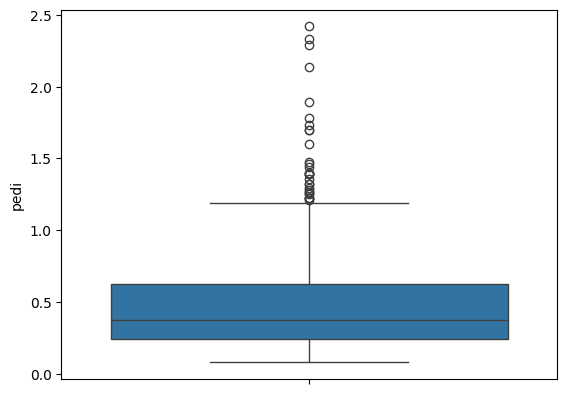

In [5]:
dados.describe()
sns.boxplot(dados.pedi)

<Axes: xlabel='pedi', ylabel='Count'>

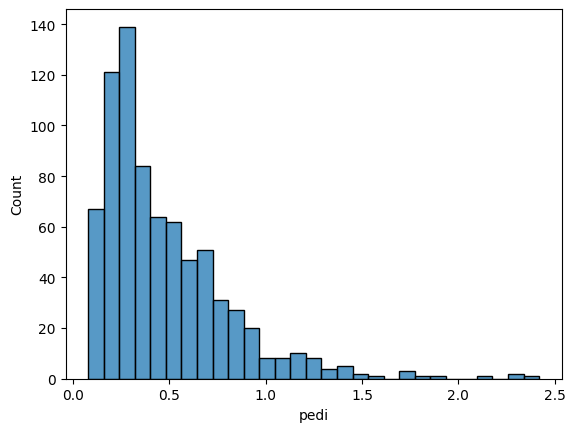

In [6]:
dados.describe()
sns.histplot(dados.pedi)

In [7]:
dados.corr()

,preg,plas,pres,skin,lest,mass,pedi,age,class
preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
plas,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
pres,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
lest,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
mass,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedi,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


# **3: Pré-Processamento dos Dados**

In [8]:
# Separando o array em componentes de imput e output
X = array[:,0:8]
Y = array[:,8]

In [10]:
# Gerando a nova escala (normalizando os dados)
scaler = MinMaxScaler(feature_range=(0,1))
rescaledx = scaler.fit_transform(X)

In [12]:
# geando um novo padrão
scaler = StandardScaler().fit(X)
standardx = scaler.transform(X)

In [13]:
# Definindo os valores para o numero de folds
num_folds = 10
seed = 7

In [17]:
# separando os dados em Folds
KFold  =KFold(num_folds, shuffle = True, random_state = seed)

# 4 : Criação da Máquina Preditiva

In [21]:
# Criando o modelo
modelo = LogisticRegression()

#cross Validation
resultado = cross_val_score(modelo, X, Y, cv = KFold )

# **5: Avaliação da Máquina Preditiva**

In [23]:
# Print do resultado
print('Acurácia: %.3f'% (resultado.mean() * 100))

Acurácia: 77.734


# **Comparando  com XGBoost**

In [24]:
# Import dos modulos
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

In [26]:
# Carregando os Dados
# Carregando os dados
arquivo = '/content/pima-data (1).csv'
colunas = ['preg', 'plas', 'pres', 'skin', 'lest', 'mass', 'pedi', 'age', 'class']
dado = read_csv(arquivo, names = colunas)
array = dado.values
dado.head()

,preg,plas,pres,skin,lest,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# **Pré-Processamento**

In [28]:
# Separando o Array em componentes de input e outpult
X = array[:,0:8]
Y = array[:,8]

# Definindo o tamanho dos dados de treino e de teste
teste_size = 0.33
seed = 7

# Criando o dataset de treino e de teste
X_treino , X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size=teste_size,random_state=seed )

# Criação da Máquina Preditiva

In [29]:
# Criando o modelo
modelo = XGBClassifier()

# treinando o modelo
modelo.fit(X_treino, Y_treino)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [30]:
# pront do modelo
print(modelo)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


In [31]:
# Fazendo Previsoes
y_pred = modelo.predict(X_teste)
Previsoes = [round(values)for  values in y_pred]

# Avaliação de Maquina Preditiva

In [33]:
# Avaliação da Maquina
accuracy = accuracy_score(Y_teste, Previsoes)
print('Acurácia: %.2f%%'% (accuracy *100.0))

Acurácia: 72.83%
